<a href="https://colab.research.google.com/github/viswakimi/PowerPulse/blob/main/powerpulse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [6]:
file_path = "/content/drive/MyDrive/guvii/projects dataset/household_power_consumption.txt"
data = pd.read_csv(file_path, sep=';', low_memory=False)
data.columns = data.columns.str.strip()  # Strip whitespace from column names

In [7]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [9]:
data.shape

(2075259, 9)

In [10]:
# Convert numeric columns
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [12]:
data.isnull().sum()

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


In [13]:
missing_data = data[data.isnull().any(axis=1)]
print(missing_data)


               Date      Time  Global_active_power  Global_reactive_power  \
6839     21/12/2006  11:23:00                  NaN                    NaN   
6840     21/12/2006  11:24:00                  NaN                    NaN   
19724    30/12/2006  10:08:00                  NaN                    NaN   
19725    30/12/2006  10:09:00                  NaN                    NaN   
41832     14/1/2007  18:36:00                  NaN                    NaN   
...             ...       ...                  ...                    ...   
1990185   28/9/2010  19:09:00                  NaN                    NaN   
1990186   28/9/2010  19:10:00                  NaN                    NaN   
1990187   28/9/2010  19:11:00                  NaN                    NaN   
1990188   28/9/2010  19:12:00                  NaN                    NaN   
2027411  24/10/2010  15:35:00                  NaN                    NaN   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
6839 

In [14]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

In [15]:
data.head(2)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0


In [16]:
data['Datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str))


In [17]:
data.head(1)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00


In [18]:

# Extract Date and Time features
data['Year'] = data['Datetime'].dt.year
data['Month'] = data['Datetime'].dt.month
data['Day'] = data['Datetime'].dt.day
data['Hour'] = data['Datetime'].dt.hour
data['Minute'] = data['Datetime'].dt.minute
data['DayOfWeek'] = data['Datetime'].dt.dayofweek  # 0=Monday, 6=Sunday

# Create additional features
data['Daily_Avg_Power'] = data.groupby('Day')['Global_active_power'].transform('mean')
data['Peak_Hours'] = data['Hour'].apply(lambda x: 1 if (6 <= x <= 9 or 17 <= x <= 20) else 0)
data['Rolling_Avg_Power'] = data['Global_active_power'].rolling(window=60, min_periods=1).mean()  # 1-hour rolling average

# Normalize/Scale Data
scaler = MinMaxScaler()
scaled_features = ['Global_active_power', 'Voltage', 'Global_intensity', 'Daily_Avg_Power']
data[scaled_features] = scaler.fit_transform(data[scaled_features])

# Save processed data
# data.to_csv("processed_data.csv", index=False)

In [19]:
data.head(3)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Year,Month,Day,Hour,Minute,DayOfWeek,Daily_Avg_Power,Peak_Hours,Rolling_Avg_Power
0,2006-12-16,17:24:00,0.374796,0.418,0.376090,0.377593,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,24,5,0.667064,1,4.216000
1,2006-12-16,17:25:00,0.478363,0.436,0.336995,0.473029,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,17,25,5,0.667064,1,4.788000
2,2006-12-16,17:26:00,0.479631,0.498,0.326010,0.473029,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,17,26,5,0.667064,1,4.983333


In [20]:
missing_data = data[data.isnull().any(axis=1)]
print(missing_data)


              Date      Time  Global_active_power  Global_reactive_power  \
6839    2006-12-21  11:23:00                  NaN                    NaN   
6840    2006-12-21  11:24:00                  NaN                    NaN   
19724   2006-12-30  10:08:00                  NaN                    NaN   
19725   2006-12-30  10:09:00                  NaN                    NaN   
41832   2007-01-14  18:36:00                  NaN                    NaN   
...            ...       ...                  ...                    ...   
1990185 2010-09-28  19:09:00                  NaN                    NaN   
1990186 2010-09-28  19:10:00                  NaN                    NaN   
1990187 2010-09-28  19:11:00                  NaN                    NaN   
1990188 2010-09-28  19:12:00                  NaN                    NaN   
2027411 2010-10-24  15:35:00                  NaN                    NaN   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
6839         NaN 

In [21]:
# Fill missing values using forward fill (carry the previous value forward)
numerical_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage','Rolling_Avg_Power',
                     'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

data[numerical_columns] = data[numerical_columns].ffill()

# Display the cleaned data
print(data.head())


        Date      Time  Global_active_power  Global_reactive_power   Voltage  \
0 2006-12-16  17:24:00             0.374796                  0.418  0.376090   
1 2006-12-16  17:25:00             0.478363                  0.436  0.336995   
2 2006-12-16  17:26:00             0.479631                  0.498  0.326010   
3 2006-12-16  17:27:00             0.480898                  0.502  0.340549   
4 2006-12-16  17:28:00             0.325005                  0.528  0.403231   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0          0.377593             0.0             1.0            17.0   
1          0.473029             0.0             1.0            16.0   
2          0.473029             0.0             2.0            17.0   
3          0.473029             0.0             1.0            17.0   
4          0.323651             0.0             1.0            17.0   

             Datetime  Year  Month  Day  Hour  Minute  DayOfWeek  \
0 2006-12-16 17:24:00  2

In [22]:
data.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0
Datetime,0


In [23]:
data.head(1)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Year,Month,Day,Hour,Minute,DayOfWeek,Daily_Avg_Power,Peak_Hours,Rolling_Avg_Power
0,2006-12-16,17:24:00,0.374796,0.418,0.37609,0.377593,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,24,5,0.667064,1,4.216


In [24]:
# Summary statistics
data.describe()


,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Year,Month,Day,Hour,Minute,DayOfWeek,Daily_Avg_Power,Peak_Hours,Rolling_Avg_Power
count,2075259,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2075259,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,2008-12-05 19:13:27.255191040,9.145105e-02,1.233280e-01,5.700035e-01,9.137399e-02,1.110995e+00,1.287958e+00,6.416570e+00,2008-12-06 07:12:59.999994112,2.008437e+03,6.450359e+00,1.577363e+01,1.150076e+01,2.950017e+01,2.998909e+00,5.758415e-01,3.334022e-01,1.086364e+00
min,2006-12-16 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2006-12-16 17:24:00,2.006000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.203333e-01
25%,2007-12-12 00:00:00,2.100308e-02,4.800000e-02,5.105008e-01,2.489627e-02,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-12 00:18:30,2.007000e+03,3.000000e+00,8.000000e+00,6.000000e+00,1.500000e+01,1.000000e+00,4.677454e-01,0.000000e+00,3.400000e-01
50%,2008-12-06 00:00:00,4.725693e-02,1.000000e-01,5.757674e-01,4.979253e-02,0.000000e+00,0.000000e+00,1.000000e+00,2008-12-06 07:13:00,2.008000e+03,6.000000e+00,1.600000e+01,1.200000e+01,3.000000e+01,3.000000e+00,6.628177e-01,0.000000e+00,7.938333e-01
75%,2009-12-01 00:00:00,1.310882e-01,1.940000e-01,6.355412e-01,1.286307e-01,0.000000e+00,1.000000e+00,1.700000e+01,2009-12-01 14:07:30,2.009000e+03,9.000000e+00,2.300000e+01,1.800000e+01,4.500000e+01,5.000000e+00,7.238276e-01,1.000000e+00,1.583467e+00
max,2010-11-26 00:00:00,1.000000e+00,1.390000e+00,1.000000e+00,1.000000e+00,8.800000e+01,8.000000e+01,3.100000e+01,2010-11-26 21:02:00,2.010000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,1.000000e+00,1.000000e+00,7.063367e+00
std,NaN,9.534421e-02,1.125144e-01,1.045420e-01,9.184181e-02,6.115908e+00,5.786865e+00,8.419505e+00,NaN,1.128677e+00,3.415762e+00,8.787773e+00,6.922227e+00,1.731810e+01,2.000064e+00,2.072131e-01,4.714290e-01,8.967905e-01


Time-series Specific Analysis-to check how the data is spread over time.

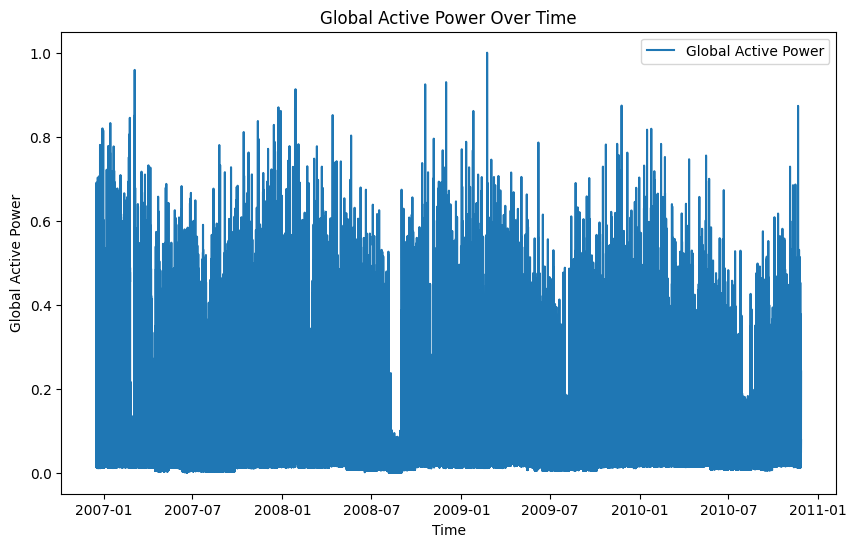

In [25]:
# Plot Global Active Power over time
plt.figure(figsize=(10,6))
plt.plot(data['Datetime'], data['Global_active_power'], label='Global Active Power')
plt.xlabel('Time')
plt.ylabel('Global Active Power')
plt.title('Global Active Power Over Time')
plt.legend()
plt.show()


Check for Seasonality- decompose the time-series data to check for any seasonal patterns.

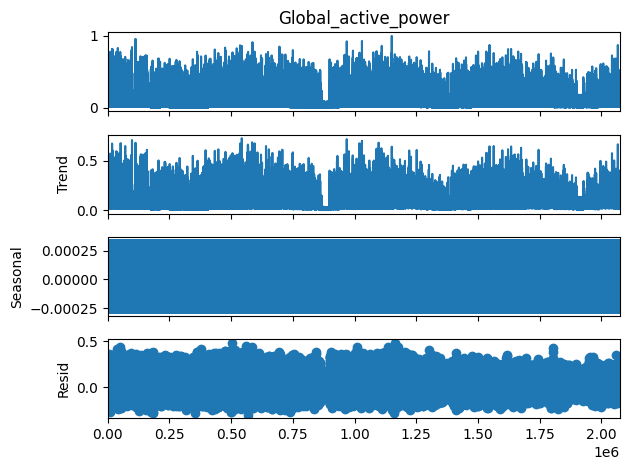

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose Global Active Power data (assuming 'Datetime' is in datetime format)
data['Datetime'] = pd.to_datetime(data['Datetime'])
decomposition = seasonal_decompose(data['Global_active_power'], model='additive', period=24)  # daily seasonality for hourly data

# Plot the decomposition
decomposition.plot()
plt.show()


 Correlation Analysis-correlations between the numerical columns to understand how variables relate to each other (e.g., Global Active Power vs. Voltage).

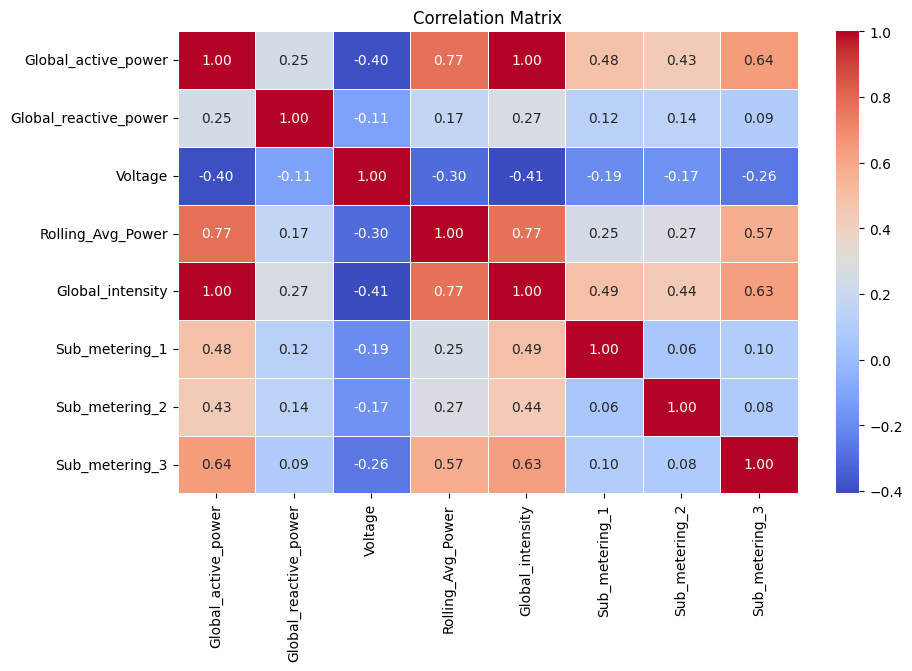

In [27]:
# Correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the heatmap
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Outlier Detection- detected by looking at boxplots for each variable.

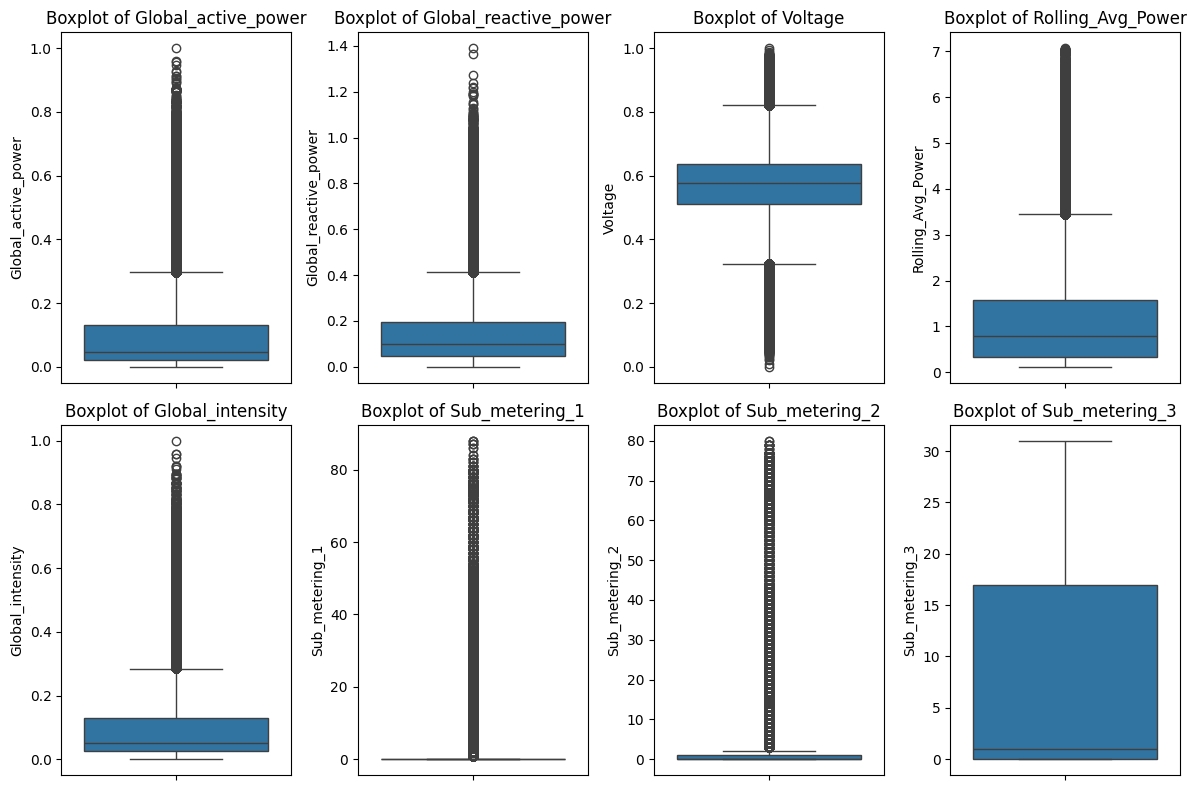

In [28]:
# Boxplot for each numerical feature
plt.figure(figsize=(12,8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)  # Create a subplot for each variable
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


Global_active_power: Outliers are likely due to spikes in power usage.

Global_reactive_power: Outliers could be from reactive power anomalies, which might be due to sudden changes in load.

Voltage: Outliers may be caused by fluctuations in voltage supply.

Global_intensity: This is directly related to active and reactive power and can have similar outliers.

Sub_metering_1, Sub_metering_2, Sub_metering_3: These represent specific sub-metered energy consumption and might have outliers due to specific appliance usage.

Histograms for Distribution- each numerical feature. This can give insight into the skewness or normality of the data.

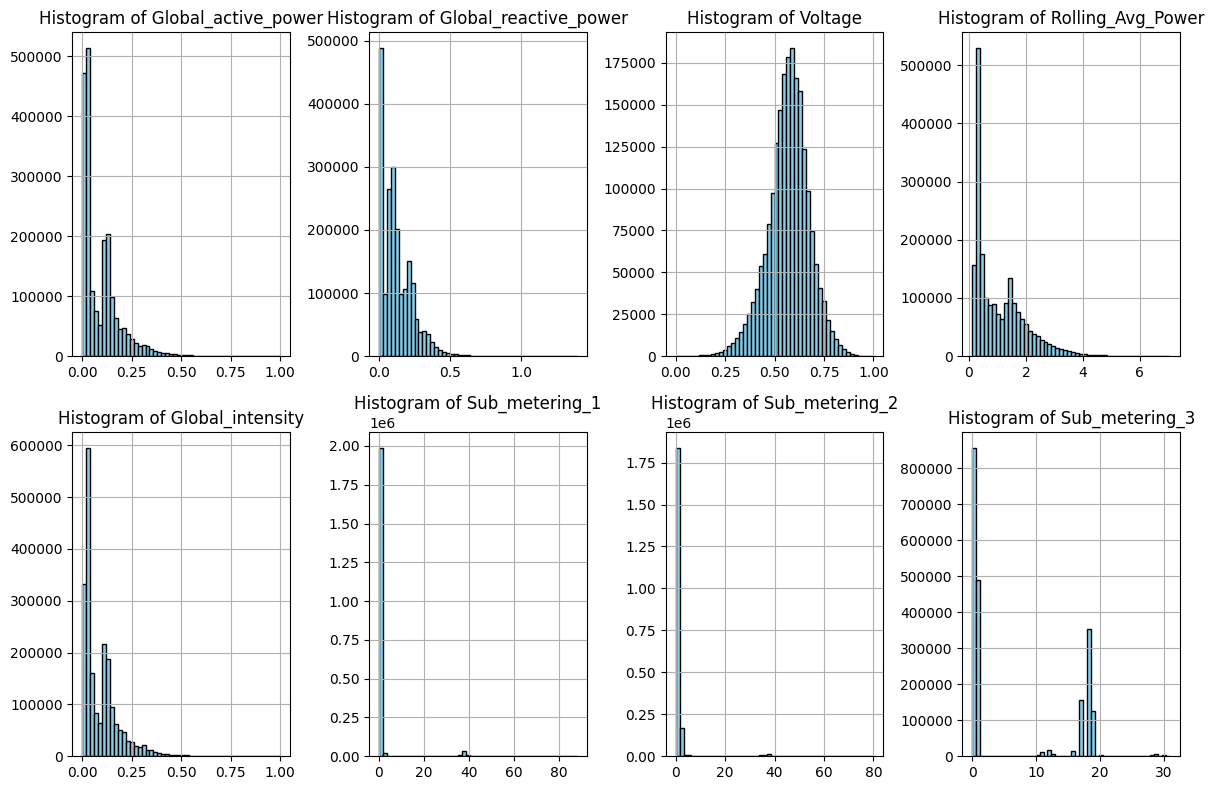

In [29]:
# Plot histograms for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)  # Create a subplot for each variable
    data[column].hist(bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()


 Identify Peak and Off-Peak Hours
You already have a column (Is_peak_hour) that identifies whether the hour is a peak hour or not. You can aggregate the data to check for patterns in energy consumption during peak and off-peak hours.

In [30]:
# Calculate the average energy consumption for peak and off-peak hours
peak_hour_data = data[data['Peak_Hours'] == 1]
off_peak_hour_data = data[data['Peak_Hours'] == 0]

# Compare mean consumption for peak and off-peak hours
peak_avg = peak_hour_data[numerical_columns].mean()
off_peak_avg = off_peak_hour_data[numerical_columns].mean()

print("Average values during peak hours:\n", peak_avg)
print("\nAverage values during off-peak hours:\n", off_peak_avg)


Average values during peak hours:
 Global_active_power      0.117912
Global_reactive_power    0.130487
Voltage                  0.535770
Rolling_Avg_Power        1.266430
Global_intensity         0.117015
Sub_metering_1           1.312814
Sub_metering_2           1.322921
Sub_metering_3           8.245563
dtype: float64

Average values during off-peak hours:
 Global_active_power      0.078216
Global_reactive_power    0.119747
Voltage                  0.587125
Rolling_Avg_Power        0.996303
Global_intensity         0.078549
Sub_metering_1           1.010054
Sub_metering_2           1.270471
Sub_metering_3           5.501790
dtype: float64


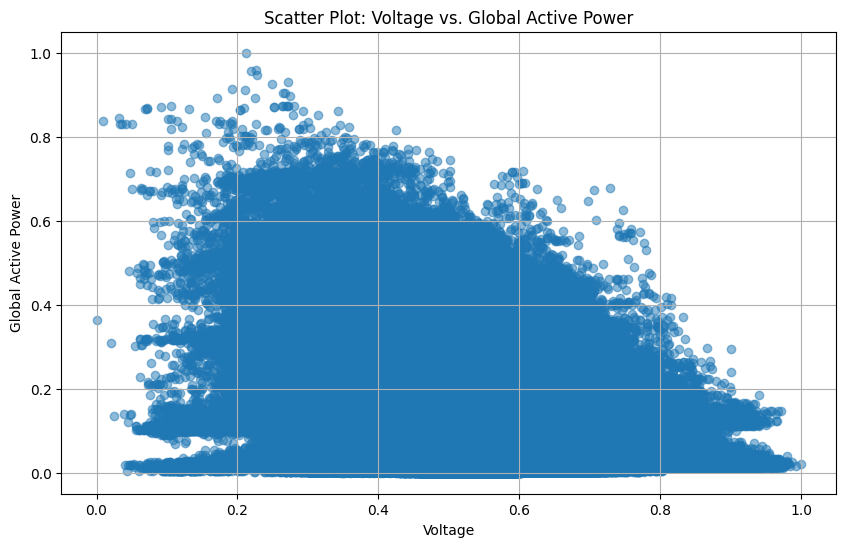

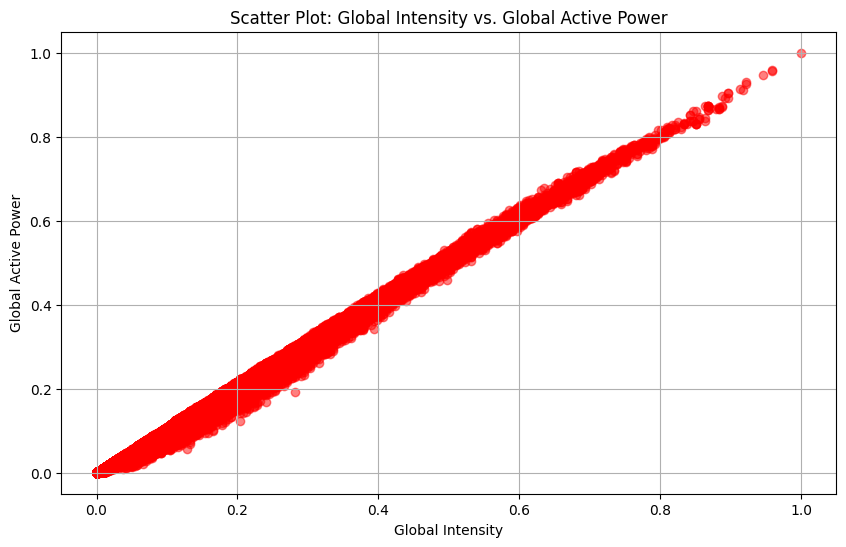

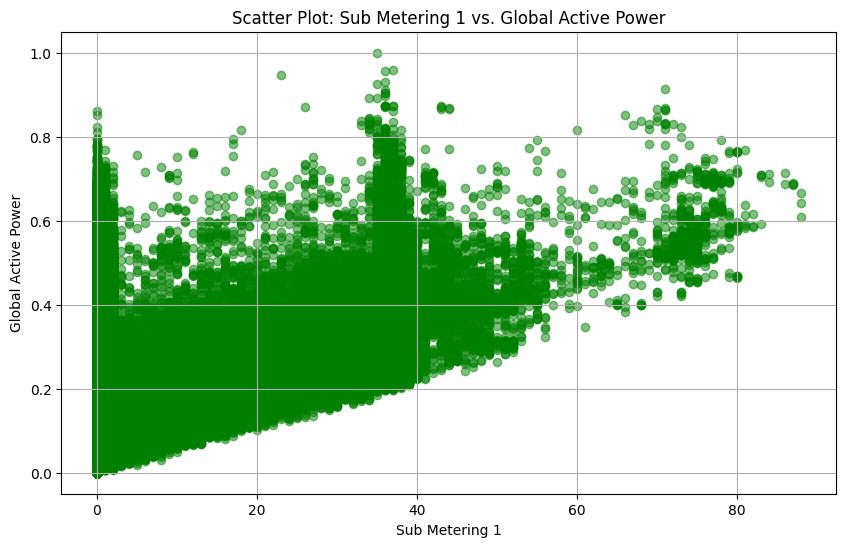

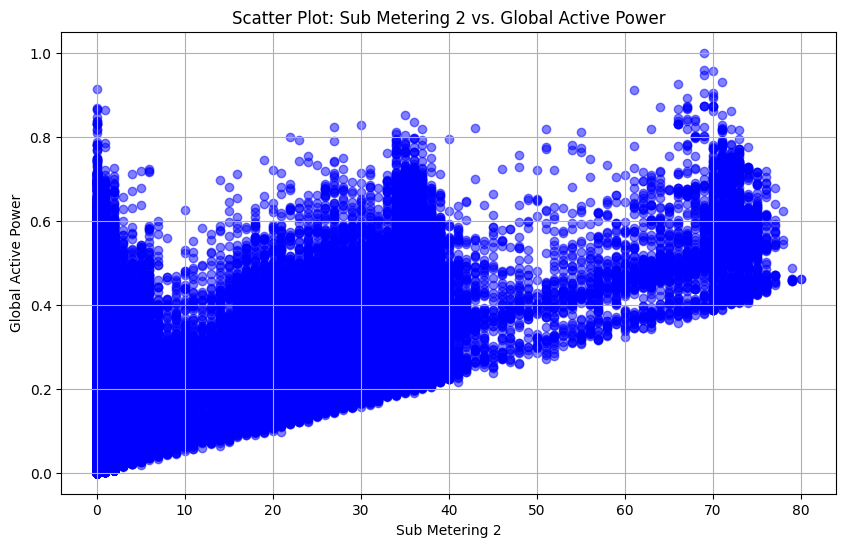

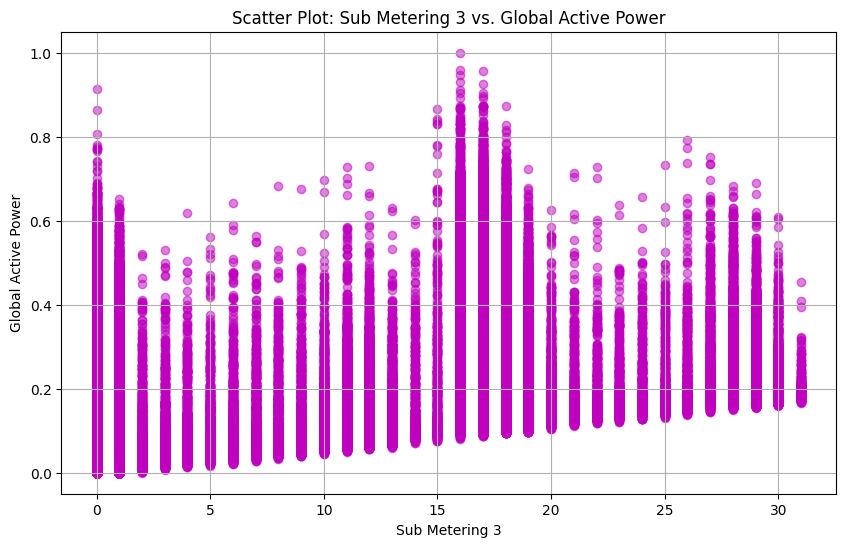

In [31]:
import matplotlib.pyplot as plt

# Scatter plot for Global_active_power vs. Voltage
plt.figure(figsize=(10, 6))
plt.scatter(data['Voltage'], data['Global_active_power'], alpha=0.5)
plt.title('Scatter Plot: Voltage vs. Global Active Power')
plt.xlabel('Voltage')
plt.ylabel('Global Active Power')
plt.grid(True)
plt.show()

# Scatter plot for Global_active_power vs. Global_intensity
plt.figure(figsize=(10, 6))
plt.scatter(data['Global_intensity'],data['Global_active_power'], alpha=0.5, color='r')
plt.title('Scatter Plot: Global Intensity vs. Global Active Power')
plt.xlabel('Global Intensity')
plt.ylabel('Global Active Power')
plt.grid(True)
plt.show()

# Scatter plot for Sub_metering_1 vs. Global_active_power
plt.figure(figsize=(10, 6))
plt.scatter(data['Sub_metering_1'], data['Global_active_power'], alpha=0.5, color='g')
plt.title('Scatter Plot: Sub Metering 1 vs. Global Active Power')
plt.xlabel('Sub Metering 1')
plt.ylabel('Global Active Power')
plt.grid(True)
plt.show()

# Scatter plot for Sub_metering_2 vs. Global_active_power
plt.figure(figsize=(10, 6))
plt.scatter(data['Sub_metering_2'], data['Global_active_power'], alpha=0.5, color='b')
plt.title('Scatter Plot: Sub Metering 2 vs. Global Active Power')
plt.xlabel('Sub Metering 2')
plt.ylabel('Global Active Power')
plt.grid(True)
plt.show()

# Scatter plot for Sub_metering_3 vs. Global_active_power
plt.figure(figsize=(10, 6))
plt.scatter(data['Sub_metering_3'], data['Global_active_power'], alpha=0.5, color='m')
plt.title('Scatter Plot: Sub Metering 3 vs. Global Active Power')
plt.xlabel('Sub Metering 3')
plt.ylabel('Global Active Power')
plt.grid(True)
plt.show()


In [32]:
data.head(2)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Year,Month,Day,Hour,Minute,DayOfWeek,Daily_Avg_Power,Peak_Hours,Rolling_Avg_Power
0,2006-12-16,17:24:00,0.374796,0.418,0.376090,0.377593,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,24,5,0.667064,1,4.216
1,2006-12-16,17:25:00,0.478363,0.436,0.336995,0.473029,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,17,25,5,0.667064,1,4.788


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   Datetime               datetime64[ns]
 10  Year                   int32         
 11  Month                  int32         
 12  Day                    int32         
 13  Hour                   int32         
 14  Minute                 int32         
 15  DayOfWeek              int32         
 16  Daily_Avg_Power        float64       
 17  Peak_Hours             int64         
 18  Rolling_Avg_Power     

In [34]:
# Q1 = data['Sub_metering_1'].quantile(0.25)
# Q3 = data['Sub_metering_1'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# outliers = data[(data['Sub_metering_1'] < lower_bound) | (data['Sub_metering_1'] > upper_bound)]


In [35]:
X = data.drop(["Datetime","Date","Time","Global_active_power","Peak_Hours","Rolling_Avg_Power"],axis=1)
y = data["Global_active_power"]

In [36]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [37]:
# Scale the features (important for models like Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Linear Regression

In [38]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)


Random Forest Regressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=30)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)


Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=30)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)


Neural Network (Deep Learning)

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Define the model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mse')

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Predictions
y_pred_nn = nn_model.predict(X_test_scaled).flatten()


Model Evaluation

In [ ]:
# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

# Evaluate all models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")
evaluate_model(y_test, y_pred_nn, "Neural Network")


Hyperparameter Tuning using GridSearchCV

In [ ]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=30), rf_params, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_rf.fit(X_train, y_train)

# Best parameters
print("Best Random Forest Parameters:", grid_rf.best_params_)


 Optimize Gradient Boosting

In [ ]:
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=30), gb_params, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_gb.fit(X_train, y_train)

# Best parameters
print("Best Gradient Boosting Parameters:", grid_gb.best_params_)


Compare Models & Select the Best One

In [ ]:
# Store results in a dictionary
model_results = {
    "Linear Regression": mean_squared_error(y_test, y_pred_lr, squared=False),
    "Random Forest": mean_squared_error(y_test, y_pred_rf, squared=False),
    "Gradient Boosting": mean_squared_error(y_test, y_pred_gb, squared=False),
    "Neural Network": mean_squared_error(y_test, y_pred_nn, squared=False)
}

# Convert to DataFrame
results_df = pd.DataFrame(model_results.items(), columns=['Model', 'RMSE']).sort_values(by='RMSE')

# Plot RMSE Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='RMSE', y='Model', data=results_df, palette='coolwarm')
plt.title("Model Performance Comparison (Lower RMSE is Better)")
plt.show()
